# **EXPLORATORY DATA ANALYSIS - Optimising NYC Taxis**

#**Project by** **-** **ANAND SATHYAN**

---



# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [17]:
# Import warnings
import warnings
warnings.filterwarnings("ignore")


In [18]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.0.2
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [20]:
# Try loading one file
df = pd.read_parquet('2023-1.parquet')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1         2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2         2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3         1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   
4         2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.97         1.0                  N           161           141   
1           1.10         1.0                  N            43           237   
2           2.51         1.0                  N            48           238   
3           1.90         1.0                  N           138             7   
4           1.43         1.0                  N           107            79   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2          9.3   1.00      0.5        0.00           0.0   
1             1          7.9   1.00      0.5        4.00           0.0   
2             1         14.9   1.00      0.5       15.00           0.0   
3             1         12.1   7.25      0.5        0.00           0.0   
4             1         11.4   1.00      0.5        3.28           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
0                    1.0         14.30                   2.5         0.00  
1                    1.0         16.90                   2.5         0.00  
2                    1.0         34.90                   2.5         0.00  
3                    1.0         20.85                   0.0         1.25  
4                    1.0         19.68                   2.5         0.00

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [21]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload



In [22]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('/content/drive/MyDrive/EDA_Assignment/trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        temp = pd.read_parquet(file_path)
        temp['date'] = temp['tpep_pickup_datetime'].dt.date
        temp['hour'] = temp['tpep_pickup_datetime'].dt.hour

        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        grouped = temp.groupby(['date', 'hour'])

        # Iterate through each hour of the selected date
        # Sample 7% of the hourly data randomly
        for _, group in grouped:
            sampled = group.sample(frac=0.07, random_state=42)
            #add data of this hour to the dataframe
            sampled_data = pd.concat([sampled_data, sampled], ignore_index=True)
        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data], ignore_index=True)

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [24]:
# Store the df in csv/parquet
df.to_parquet('taxi_sample_records.parquet', index=False)

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [26]:
# Load the new data file
taxi_records = pd.read_parquet('taxi_sample_records.parquet')
taxi_records= taxi_records.sort_values(by='tpep_pickup_datetime')



In [27]:
# df.head()
taxi_records.head(-10)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
863671          2  2022-12-31 23:51:30   2022-12-31 23:56:06              1.0   
863822          2  2023-01-01 00:00:57   2023-01-01 00:15:11              1.0   
864015          2  2023-01-01 00:01:18   2023-01-01 00:17:01              1.0   
863743          2  2023-01-01 00:02:19   2023-01-01 00:30:49              1.0   
864022          1  2023-01-01 00:02:43   2023-01-01 00:08:33              1.0   
...           ...                  ...                   ...              ...   
2228030         2  2023-12-31 23:49:30   2023-12-31 23:58:10              2.0   
2228204         2  2023-12-31 23:49:40   2023-12-31 23:56:14              1.0   
2228243         1  2023-12-31 23:51:17   2023-12-31 23:56:29              3.0   
2228137         2  2023-12-31 23:51:50   2024-01-01 00:03:37              2.0   
2228098         2  2023-12-31 23:52:29   2024-01-01 00:02:11              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
863671            0.86         1.0                  N           141   
863822            9.98         1.0                  N           138   
864015            4.38         1.0                  N           234   
863743           20.37         2.0                  N           132   
864022            0.90         1.0                  N           238   
...                ...         ...                ...           ...   
2228030           1.35         1.0                  N            48   
2228204           1.78         1.0                  N           143   
2228243           0.90         1.0                  N            50   
2228137           2.35         1.0                  N           229   
2228098           4.24         1.0                  N           132   

         DOLocationID  payment_type  ...  mta_tax  tip_amount  tolls_amount  \
863671            140             1  ...      0.5        2.00          0.00   
863822             97             1  ...      0.5        5.00          0.00   
864015            112             1  ...      0.5        6.55          6.55   
863743            140             1  ...      0.5       12.00          6.55   
864022             24             1  ...      0.5        5.00          0.00   
...               ...           ...  ...      ...         ...           ...   
2228030           239             1  ...      0.5        3.00          0.00   
2228204           236             1  ...      0.5        3.00          0.00   
2228243           143             1  ...      0.0        2.90          0.00   
2228137           239             2  ...      0.5        0.00          0.00   
2228098           139             1  ...      0.5        4.82          0.00   

         improvement_surcharge  total_amount  congestion_surcharge  \
863671                     1.0         13.50                   2.5   
863822                     1.0         51.75                   0.0   
864015                     1.0         39.30                   2.5   
863743                     1.0         92.55                   2.5   
864022                     1.0         16.50                   2.5   
...                        ...           ...                   ...   
2228030                    1.0         18.00                   2.5   
2228204                    1.0         18.00                   2.5   
2228243                    1.0         14.60                   2.5   
2228137                    1.0         19.20                   2.5   
2228098                    1.0         30.67                   2.5   

         Airport_fee        date  hour airport_fee  
863671           NaN  2022-12-31    23        0.00  
863822           NaN  2023-01-01     0        1.25  
864015           NaN  2023-01-01     0        0.00  
863743           NaN  2023-01-01     0        0.00  
864022           NaN  2023-01-01     0        0.00  
...              ...         ...   ...         ...  
2228030         0.00  

In [28]:
# df.info()
taxi_records.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2854488 entries, 863671 to 2228057
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [29]:
# Fix the index and drop any columns that are not needed
taxi_records.reset_index(drop=True, inplace=True)
taxi_records.drop(columns=['hour','date','store_and_fwd_flag'], inplace=True)
taxi_records.head(-10)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               2  2022-12-31 23:51:30   2022-12-31 23:56:06              1.0   
1               2  2023-01-01 00:00:57   2023-01-01 00:15:11              1.0   
2               2  2023-01-01 00:01:18   2023-01-01 00:17:01              1.0   
3               2  2023-01-01 00:02:19   2023-01-01 00:30:49              1.0   
4               1  2023-01-01 00:02:43   2023-01-01 00:08:33              1.0   
...           ...                  ...                   ...              ...   
2854473         2  2023-12-31 23:49:30   2023-12-31 23:58:10              2.0   
2854474         2  2023-12-31 23:49:40   2023-12-31 23:56:14              1.0   
2854475         1  2023-12-31 23:51:17   2023-12-31 23:56:29              3.0   
2854476         2  2023-12-31 23:51:50   2024-01-01 00:03:37              2.0   
2854477         2  2023-12-31 23:52:29   2024-01-01 00:02:11              1.0   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0                 0.86         1.0           141           140             1   
1                 9.98         1.0           138            97             1   
2                 4.38         1.0           234           112             1   
3                20.37         2.0           132           140             1   
4                 0.90         1.0           238            24             1   
...                ...         ...           ...           ...           ...   
2854473           1.35         1.0            48           239             1   
2854474           1.78         1.0           143           236             1   
2854475           0.90         1.0            50           143             1   
2854476           2.35         1.0           229           239             2   
2854477           4.24         1.0           132           139             1   

         fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0                6.5    1.0      0.5        2.00          0.00   
1               38.0    6.0      0.5        5.00          0.00   
2               21.2    1.0      0.5        6.55          6.55   
3               70.0    0.0      0.5       12.00          6.55   
4                6.5    3.5      0.5        5.00          0.00   
...              ...    ...      ...         ...           ...   
2854473         10.0    1.0      0.5        3.00          0.00   
2854474         10.0    1.0      0.5        3.00          0.00   
2854475          7.2    3.5      0.0        2.90          0.00   
2854476         14.2    1.0      0.5        0.00          0.00   
2854477         19.1    1.0      0.5        4.82          0.00   

         improvement_surcharge  total_amount  congestion_surcharge  \
0                          1.0         13.50                   2.5   
1                          1.0         51.75                   0.0   
2                          1.0         39.30                   2.5   
3                          1.0         92.55                   2.5   
4                          1.0         16.50                   2.5   
...                        ...           ...                   ...   
2854473                    1.0         18.00                   2.5   
2854474                    1.0         18.00                   2.5   
2854475                    1.0         14.60                   2.5   
2854476                    1.0         19.20                   2.5   
2854477                    1.0         30.67                   2.5   

         Airport_fee  airport_fee  
0                NaN         0.00  
1                NaN         1.25  
2                NaN         0.00  
3                NaN         0.00  
4                NaN         0.00  
...              ...          ...  
2854473         0.00          NaN  
2854474         0.00          NaN  
2854475         0.00          NaN  
2854476         0.00          NaN  
2854477         1.75          NaN  

[2854478

In [30]:
#Adding the trip_duration column
taxi_records['trip_duration'] = (taxi_records['tpep_dropoff_datetime'] - taxi_records['tpep_pickup_datetime']).dt.total_seconds() / 60

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [31]:
# Combine the two airport fee columns
taxi_records['Airport_fee'] = taxi_records['Airport_fee'].fillna(0) +taxi_records['airport_fee'].fillna(0)
taxi_records.drop(columns=['airport_fee'], inplace=True)
taxi_records.head()


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2022-12-31 23:51:30   2022-12-31 23:56:06              1.0   
1         2  2023-01-01 00:00:57   2023-01-01 00:15:11              1.0   
2         2  2023-01-01 00:01:18   2023-01-01 00:17:01              1.0   
3         2  2023-01-01 00:02:19   2023-01-01 00:30:49              1.0   
4         1  2023-01-01 00:02:43   2023-01-01 00:08:33              1.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           0.86         1.0           141           140             1   
1           9.98         1.0           138            97             1   
2           4.38         1.0           234           112             1   
3          20.37         2.0           132           140             1   
4           0.90         1.0           238            24             1   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0          6.5    1.0      0.5        2.00          0.00   
1         38.0    6.0      0.5        5.00          0.00   
2         21.2    1.0      0.5        6.55          6.55   
3         70.0    0.0      0.5       12.00          6.55   
4          6.5    3.5      0.5        5.00          0.00   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0                    1.0         13.50                   2.5         0.00   
1                    1.0         51.75                   0.0         1.25   
2                    1.0         39.30                   2.5         0.00   
3                    1.0         92.55                   2.5         0.00   
4                    1.0         16.50                   2.5         0.00   

   trip_duration  
0       4.600000  
1      14.233333  
2      15.716667  
3      28.500000  
4       5.833333

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [32]:
# check where values of fare amount are negative
taxi_records[taxi_records['total_amount'] < 0]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
5965            2  2023-01-02 05:12:19   2023-01-02 05:41:45              1.0   
13695           2  2023-01-03 14:24:45   2023-01-03 14:25:14              1.0   
48489           2  2023-01-08 07:49:53   2023-01-08 08:05:24              1.0   
116067          2  2023-01-17 12:37:35   2023-01-17 13:24:00              1.0   
117186          2  2023-01-17 15:03:44   2023-01-17 15:36:28              1.0   
...           ...                  ...                   ...              ...   
2717030         2  2023-12-13 15:34:22   2023-12-13 15:45:08              1.0   
2756096         2  2023-12-17 08:10:57   2023-12-17 08:28:46              1.0   
2774051         2  2023-12-19 15:33:14   2023-12-19 16:05:27              2.0   
2839194         2  2023-12-29 14:59:58   2023-12-29 15:38:59              1.0   
2840343         2  2023-12-29 17:32:20   2023-12-29 17:33:49              1.0   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
5965             17.07         3.0           142             1             2   
13695             0.00         2.0           132           132             2   
48489             0.00         2.0           237            95             2   
116067           17.68         2.0           230           132             2   
117186            4.12         1.0           239           168             2   
...                ...         ...           ...           ...           ...   
2717030           4.36         1.0           132           216             2   
2756096          11.27         1.0           132            70             2   
2774051           5.83         1.0           186            87             2   
2839194          10.91         1.0           132            17             2   
2840343           0.02         1.0           161           161             2   

         fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
5965             0.0    0.0      0.0         0.0           0.0   
13695            0.0    0.0     -0.5         0.0           0.0   
48489            0.0    0.0     -0.5         0.0           0.0   
116067           0.0    0.0     -0.5         0.0           0.0   
117186           0.0    0.0     -0.5         0.0           0.0   
...              ...    ...      ...         ...           ...   
2717030          0.0    0.0     -0.5         0.0           0.0   
2756096          0.0    0.0     -0.5         0.0           0.0   
2774051          0.0    0.0     -0.5         0.0           0.0   
2839194          0.0    0.0     -0.5         0.0           0.0   
2840343          0.0    0.0     -0.5         0.0           0.0   

         improvement_surcharge  total_amount  congestion_surcharge  \
5965                      -1.0         -1.00                   0.0   
13695                     -1.0         -5.25                  -2.5   
48489                     -1.0         -4.00                  -2.5   
116067                    -1.0         -4.00                  -2.5   
117186                    -1.0         -4.00                  -2.5   
...                        ...           ...                   ...   
2717030                   -1.0         -3.25                   0.0   
2756096                   -1.0         -3.25                   0.0   
2774051                   -1.0         -4.00                  -2.5   
2839194                   -1.0         -3.25                   0.0   
2840343                   -1.0         -4.00                  -2.5   

         Airport_fee  trip_duration  
5965            0.00      29.433333  
13695          -1.25       0.483333  
48489           0.00      15.516667  
116067          0.00      46.416667  
117186          0.00      32.733333  
...              ...            ...  
2717030        -1.75      10.766667  
2756096        -1.75      17.816667  
2774051         0.00      32.216667  
2839194        -1.75      39.016667  
2840343         0.00   

Did you notice something different in the `RatecodeID` column for above records?

In [33]:
# Analyse RatecodeID for the negative fare amounts
taxi_records[taxi_records['total_amount'] < 0]['RatecodeID'].value_counts()



RatecodeID
1.0    80
2.0    45
5.0     6
3.0     1
4.0     1
Name: count, dtype: int64

In [34]:
# Find which columns have negative values
taxi_records.select_dtypes(include='number').lt(0).sum()

VendorID                   0
passenger_count            0
trip_distance              0
RatecodeID                 0
PULocationID               0
DOLocationID               0
payment_type               0
fare_amount                0
extra                      4
mta_tax                  126
tip_amount                 0
tolls_amount               0
improvement_surcharge    133
total_amount             133
congestion_surcharge      98
Airport_fee               27
trip_duration            174
dtype: int64

In [35]:
# fix these negative values
taxi_records = taxi_records[taxi_records['total_amount'] >= 0]
taxi_records = taxi_records[taxi_records['extra'] >= 0]
taxi_records = taxi_records[~(taxi_records['trip_duration']<0)]


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [36]:
# Find the proportion of missing values in each column
100*taxi_records.isnull().sum()/len(taxi_records)


VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          3.418181
trip_distance            0.000000
RatecodeID               3.418181
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     3.418181
Airport_fee              0.000000
trip_duration            0.000000
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [37]:
# Display the rows with null values
taxi_records[taxi_records['passenger_count'].isnull()]
# Impute NaN values in 'passenger_count'
taxi_records['passenger_count'].fillna(1,inplace=True)

Did you find zeroes in passenger_count? Handle these.

In [38]:
taxi_records['passenger_count'].replace(0, np.nan, inplace=True)
taxi_records['passenger_count'].fillna(1,inplace=True)

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [39]:
# Fix missing values in 'RatecodeID'
taxi_records['RatecodeID'].isnull().sum()
#adding null values to 99(placeholder for null values)
taxi_records['RatecodeID'].fillna(99,inplace=True)

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [40]:
# handle null values in congestion_surcharge
taxi_records[taxi_records['congestion_surcharge'].isnull()].head()
#imputing null values with 2.5 most common value
taxi_records['congestion_surcharge'].fillna(2.5,inplace=True)


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [41]:
# Handle any remaining missing values




### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [42]:
# Describe the data and check if there are any potential outliers present
taxi_records.describe().T
# Check for potential out of place values in various columns

count                        mean  \
VendorID               2854179.0                    1.732779   
tpep_pickup_datetime     2854179  2023-07-02 19:55:05.204029   
tpep_dropoff_datetime    2854179  2023-07-02 20:12:31.118220   
passenger_count        2854179.0                    1.371781   
trip_distance          2854179.0                    3.876238   
RatecodeID             2854179.0                     4.96165   
PULocationID           2854179.0                  165.278149   
DOLocationID           2854179.0                  164.043403   
payment_type           2854179.0                    1.163928   
fare_amount            2854179.0                    19.90065   
extra                  2854179.0                    1.588905   
mta_tax                2854179.0                    0.495308   
tip_amount             2854179.0                    3.549797   
tolls_amount           2854179.0                    0.597406   
improvement_surcharge  2854179.0                    0.999081   
total_amount           2854179.0                   28.968315   
congestion_surcharge   2854179.0                    2.314353   
Airport_fee            2854179.0                    0.138466   
trip_duration          2854179.0                   17.431903   

                                       min                  25%  \
VendorID                               1.0                  1.0   
tpep_pickup_datetime   2022-12-31 23:51:30  2023-04-02 16:10:18   
tpep_dropoff_datetime  2022-12-31 23:56:06  2023-04-02 16:28:27   
passenger_count                        1.0                  1.0   
trip_distance                          0.0                 1.05   
RatecodeID                             1.0                  1.0   
PULocationID                           1.0                132.0   
DOLocationID                           1.0                114.0   
payment_type                           0.0                  1.0   
fare_amount                            0.0                  9.3   
extra                                  0.0                  0.0   
mta_tax                                0.0                  0.5   
tip_amount                             0.0                  1.0   
tolls_amount                           0.0                  0.0   
improvement_surcharge                  0.0                  1.0   
total_amount                           0.0                15.96   
congestion_surcharge                   0.0                  2.5   
Airport_fee                            0.0                  0.0   
trip_duration                          0.0             7.683333   

                                       50%                         75%  \
VendorID                               2.0                         2.0   
tpep_pickup_datetime   2023-06-27 15:38:35  2023-10-06 19:34:12.500000   
tpep_dropoff_datetime  2023-06-27 15:58:13  2023-10-06 19:50:19.500000   
passenger_count                        1.0                         1.0   
trip_distance                          1.8                         3.4   
RatecodeID                             1.0                         1.0   
PULocationID                         162.0                       234.0   
DOLocationID                         162.0                       234.0   
payment_type                           1.0                         1.0   
fare_amount                           13.5                        21.9   
extra                                  1.0                         2.5   
mta_tax                                0.5                         0.5   
tip_amount                            2.85                        4.42   
tolls_amount                           0.0                         0.0   
improvement_surcharge                  1.0                         1.0   
total_amount                          21.0                       30.94   
congestion_surcharge                   2.5                         2.5   
Airport_fee                            0.0                         0.0   

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [43]:
# remove passenger_count > 6
taxi_records['passenger_count'].value_counts()
taxi_records = taxi_records[taxi_records['passenger_count'] <= 6]


In [44]:
# Continue with outlier handling
taxi_records = taxi_records[~((taxi_records['trip_distance']<0.1)&(taxi_records['fare_amount']>300))]
taxi_records = taxi_records[~(((taxi_records['trip_distance'] == 0) | (taxi_records['fare_amount'] == 0)) & (taxi_records['PULocationID'] != taxi_records['DOLocationID']))]
taxi_records = taxi_records[~(taxi_records['trip_distance'] > 250)]
taxi_records = taxi_records[~(taxi_records['fare_amount']>1500)]
taxi_records = taxi_records[~(taxi_records['trip_duration'] == 0)]
taxi_records = taxi_records[taxi_records['trip_duration'] <= 180]






In [45]:
# Do any columns need standardising?



## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [46]:
taxi_records.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Airport_fee',
 'trip_duration']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

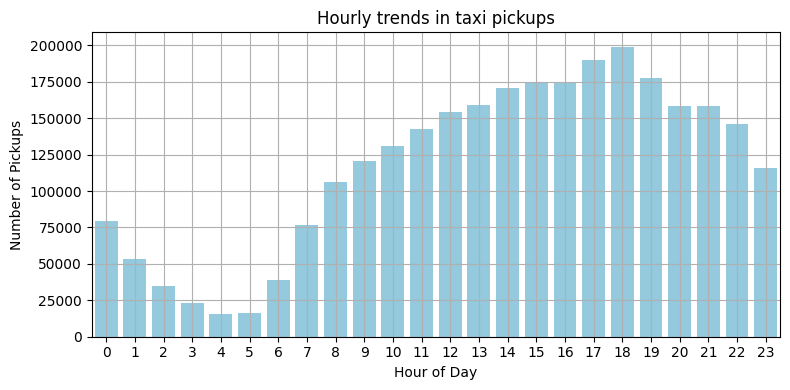

In [47]:
# Find and show the hourly trends in taxi pickups
taxi_records['hour'] = taxi_records['tpep_pickup_datetime'].dt.hour

plt.figure(figsize=(8,4))
sns.countplot(data=taxi_records , x='hour', color='skyblue')
plt.title('Hourly trends in taxi pickups')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.grid()
plt.tight_layout()
plt.show()


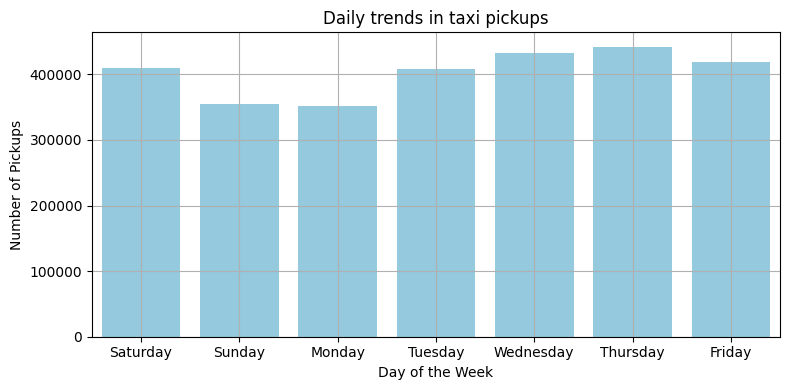

In [48]:
# Find and show the daily trends in taxi pickups (days of the week)
taxi_records['day'] = taxi_records['tpep_pickup_datetime'].dt.day_name()

plt.figure(figsize=(8,4))
sns.countplot(data=taxi_records , x='day', color='skyblue')
plt.title('Daily trends in taxi pickups')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Pickups')
plt.grid()
plt.tight_layout()
plt.show()


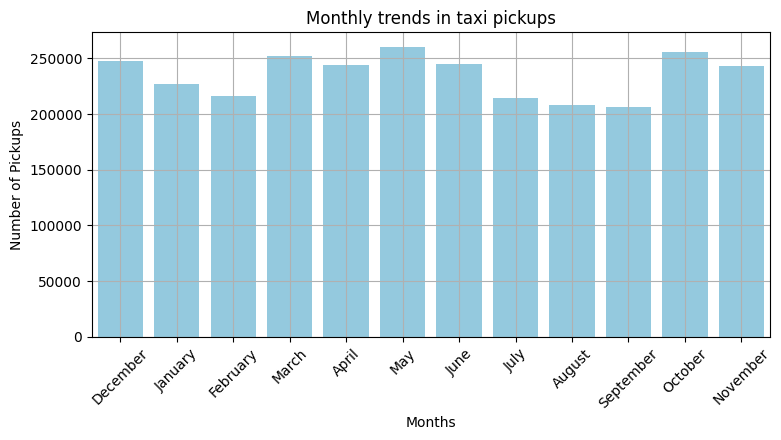

In [49]:
# Show the monthly trends in pickups
taxi_records['month'] = taxi_records['tpep_pickup_datetime'].dt.month_name()

plt.figure(figsize=(8,4))
sns.countplot(data=taxi_records , x='month', color='skyblue')
plt.title('Monthly trends in taxi pickups')
plt.xlabel('Months')
plt.ylabel('Number of Pickups')
plt.grid()
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [50]:
# Analyse the above parameters
(taxi_records[['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']] <= 0).sum()

fare_amount         521
tip_amount       626525
total_amount        304
trip_distance     23676
dtype: int64

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [51]:
# Create a df with non zero entries for the selected parameters.
filtered_records = taxi_records[(taxi_records['fare_amount'] > 0) & (taxi_records['tip_amount'] > 0) & (taxi_records['total_amount'] > 0) & ((taxi_records['trip_distance'] > 0) | ((taxi_records['trip_distance'] == 0) & (taxi_records['PULocationID'] == taxi_records['DOLocationID'])))]

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

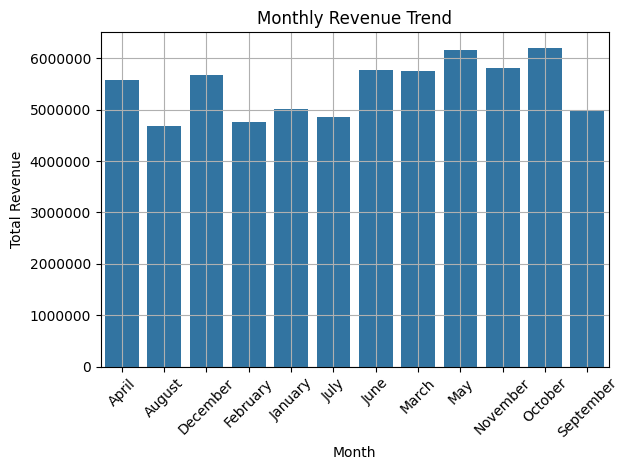

In [52]:
# Group data by month and analyse monthly revenue
monthly_revenue = filtered_records.groupby('month')['total_amount'].sum()

sns.barplot(x=monthly_revenue.index, y=monthly_revenue.values)
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

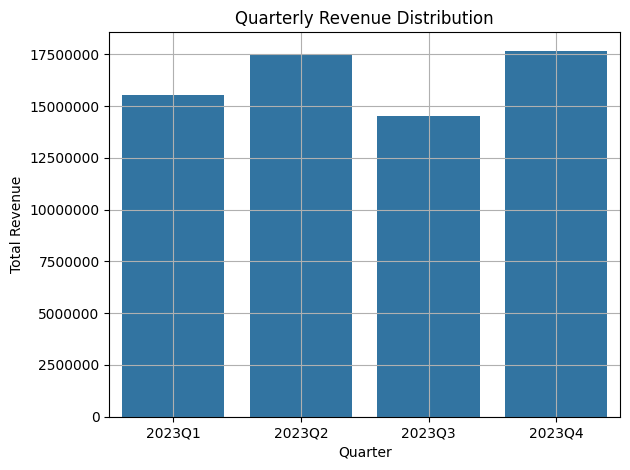

In [53]:
# Calculate proportion of each quarter
filtered_records['quarter'] = filtered_records['tpep_pickup_datetime'].dt.to_period('Q')
quarter_revenue = filtered_records.groupby('quarter')['total_amount'].sum()
quarter_revenue =quarter_revenue[quarter_revenue.index != '2022Q4']

sns.barplot(x=quarter_revenue.index, y=quarter_revenue.values)
plt.title('Quarterly Revenue Distribution')
plt.xlabel('Quarter')
plt.ylabel('Total Revenue')
plt.ticklabel_format(style='plain', axis='y')
plt.grid()
plt.tight_layout()
plt.show()


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

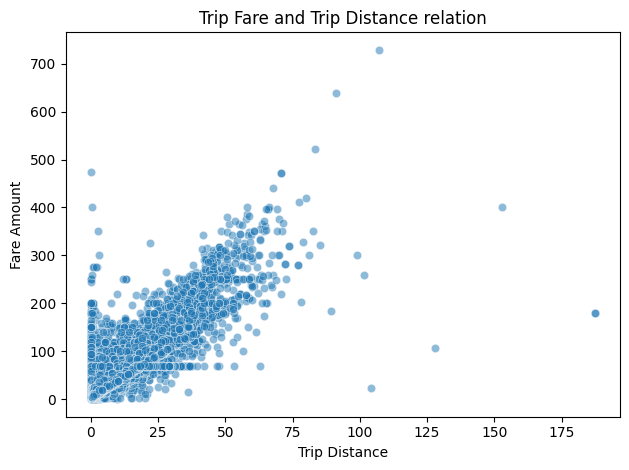

Correlation between trip_distance and fare_amount: 0.9495


In [54]:
# Show how trip fare is affected by distance
clean_trip_distance = filtered_records[filtered_records['trip_distance'] > 0]

sns.scatterplot(data=clean_trip_distance, x='trip_distance', y='fare_amount',alpha = 0.5)
plt.title('Trip Fare and Trip Distance relation')
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')
plt.tight_layout()
plt.show()

correlation = clean_trip_distance['trip_distance'].corr(clean_trip_distance['fare_amount'])
print(f"Correlation between trip_distance and fare_amount: {correlation:.4f}")

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

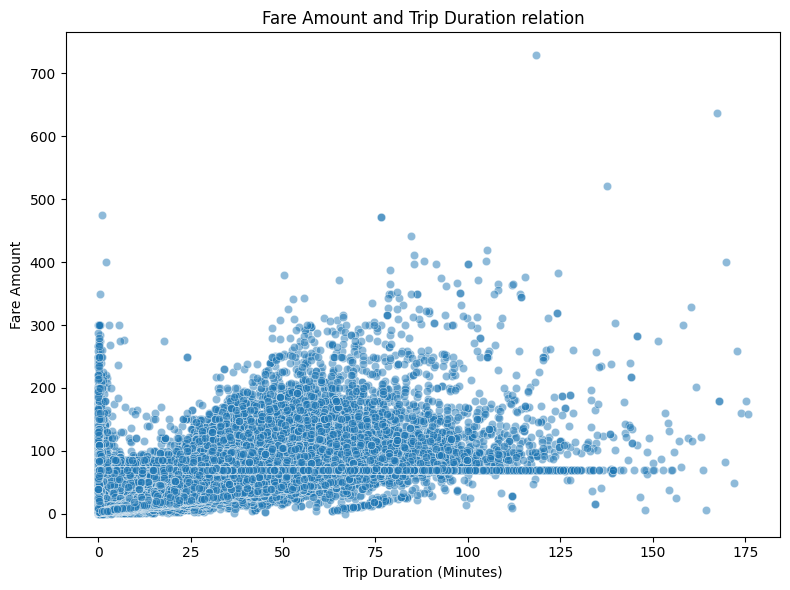

In [55]:
# Show relationship between fare and trip duration
plt.figure(figsize=(8, 6))
sns.scatterplot(data=filtered_records, x='trip_duration', y='fare_amount', alpha=0.5)
plt.title('Fare Amount and Trip Duration relation')
plt.xlabel('Trip Duration (Minutes)')
plt.ylabel('Fare Amount')
plt.tight_layout()
plt.show()


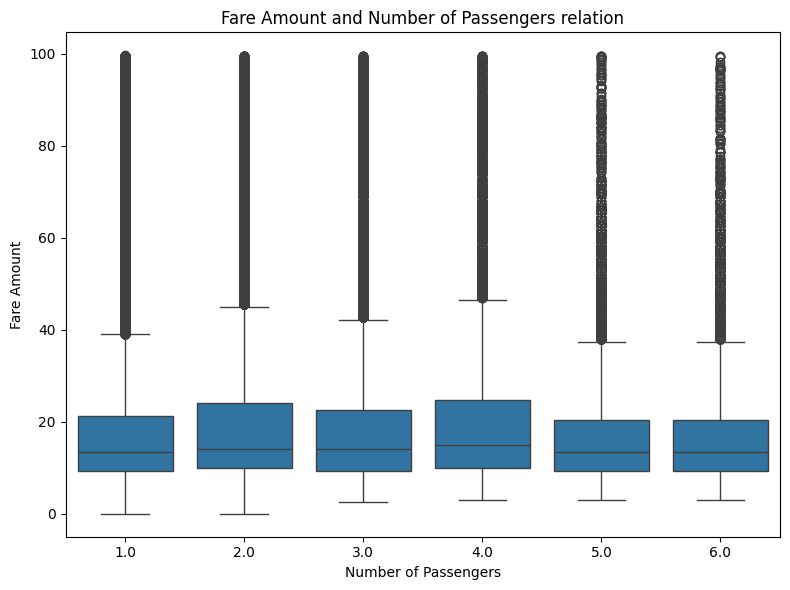

In [56]:
# Show relationship between fare and number of passengers
plt.figure(figsize=(8, 6))
sns.boxplot(data=filtered_records[filtered_records['fare_amount'] < 100], x='passenger_count', y='fare_amount')
plt.title('Fare Amount and Number of Passengers relation')
plt.xlabel('Number of Passengers')
plt.ylabel('Fare Amount')
plt.tight_layout()
plt.show()


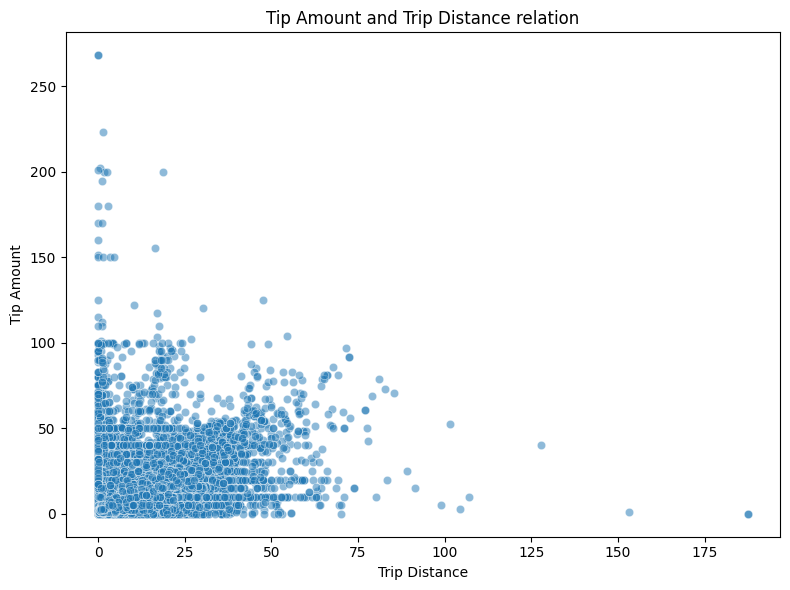

In [57]:
# Show relationship between tip and trip distance
plt.figure(figsize=(8,6))
sns.scatterplot(data=filtered_records, x='trip_distance', y='tip_amount', alpha=0.5)
plt.title('Tip Amount and Trip Distance relation')
plt.xlabel('Trip Distance')
plt.ylabel('Tip Amount')
plt.tight_layout()
plt.show()


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

In [58]:
filtered_records['payment_type'].value_counts()

payment_type
1    2133616
0      57962
3         98
4         43
2         35
Name: count, dtype: int64

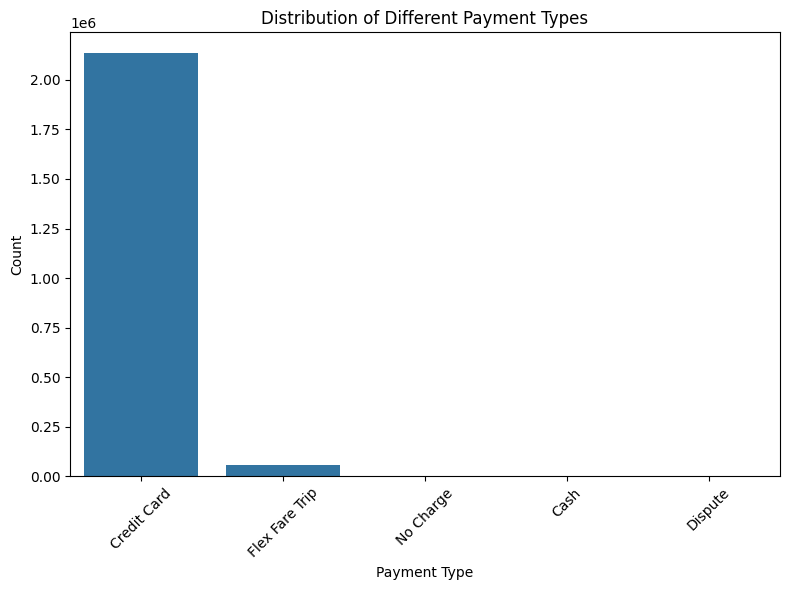

In [59]:
# Analyse the distribution of different payment types (payment_type)
payment_map = {0:'Flex Fare Trip',1:'Credit Card',2:'Cash',3:'No Charge',4:'Dispute',5:'Unknown',6:'Voided trip'}
filtered_records['payment_type'] = filtered_records['payment_type'].map(payment_map)


plt.figure(figsize=(8,6))
sns.countplot(data=filtered_records, x='payment_type')
plt.title('Distribution of Different Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()



- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [60]:
!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [61]:
# import geopandas as gpd
import geopandas as gpd

# Read the shapefile using geopandas
zones = gpd.read_file('/content/drive/MyDrive/EDA_Assignment/taxi_zones/taxi_zones.shp')
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

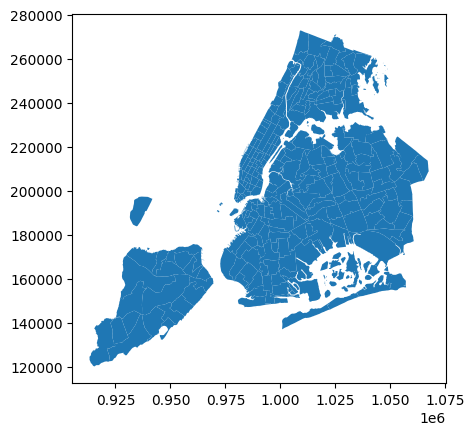

In [62]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [63]:
# Merge zones and trip records using locationID and PULocationID
complete_taxi_records = pd.merge(zones,filtered_records, left_on='LocationID', right_on='PULocationID', how='inner')

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [64]:
# Group data by location and calculate the number of trips
grouped_data = complete_taxi_records.groupby('LocationID').size().reset_index(name='total_trips')

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [65]:
# Merge trip counts back to the zones GeoDataFrame
zones = zones.merge(grouped_data, left_on='LocationID', right_on='LocationID', how='left')
zones['total_trips'].fillna(0, inplace=True)



The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

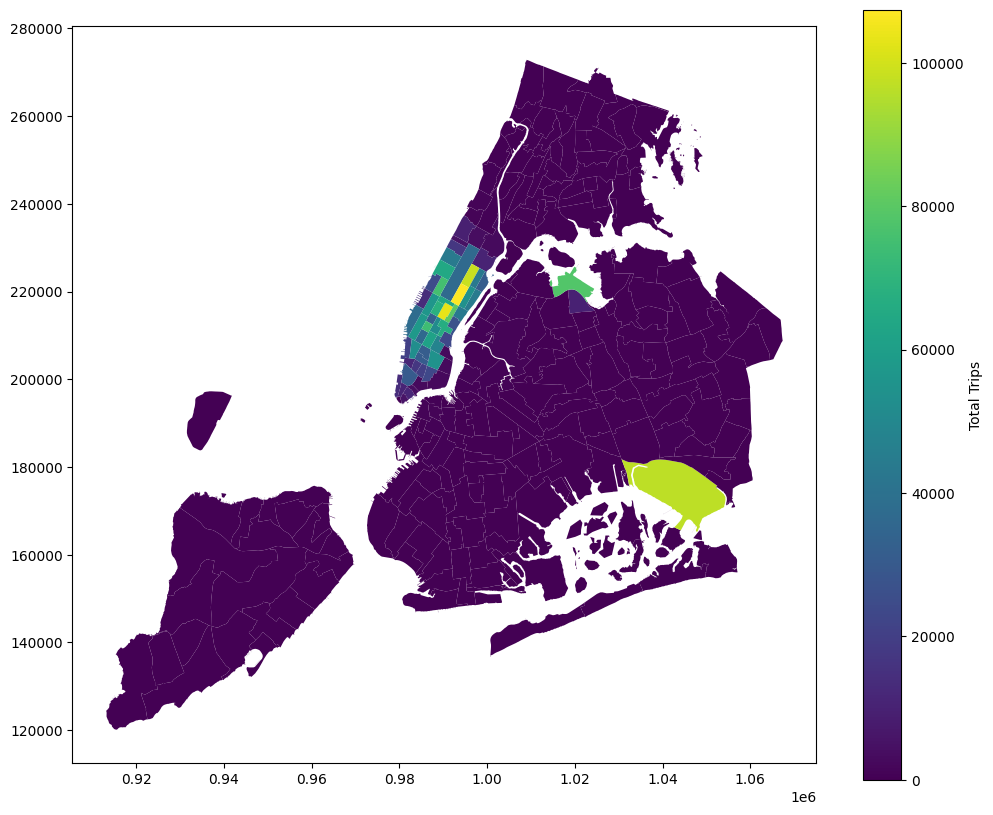

In [66]:
# Define figure and axis
fig,ax = plt.subplots(1,1,figsize=(12,10))

# Plot the map and display it
zones.plot(column='total_trips', ax=ax, legend=True, legend_kwds={'label': "Total Trips", 'orientation': "vertical"})
plt.show()


In [67]:
# can you try displaying the zones DF sorted by the number of trips?
sorted_zones = zones.sort_values(by='total_trips', ascending=False)
sorted_zones.head(10)


OBJECTID  Shape_Leng  Shape_Area                          zone  \
236       237    0.042213    0.000096         Upper East Side South   
160       161    0.035804    0.000072                Midtown Center   
235       236    0.044252    0.000103         Upper East Side North   
131       132    0.245479    0.002038                   JFK Airport   
161       162    0.035270    0.000048                  Midtown East   
137       138    0.107467    0.000537             LaGuardia Airport   
141       142    0.038176    0.000076           Lincoln Square East   
185       186    0.024696    0.000037  Penn Station/Madison Sq West   
229       230    0.031028    0.000056     Times Sq/Theatre District   
169       170    0.045769    0.000074                   Murray Hill   

     LocationID    borough                                           geometry  \
236         237  Manhattan  POLYGON ((993633.442 216961.016, 993507.232 21...   
160         161  Manhattan  POLYGON ((991081.026 214453.698, 990952.644 21...   
235         236  Manhattan  POLYGON ((995940.048 221122.92, 995812.322 220...   
131         132     Queens  MULTIPOLYGON (((1032791.001 181085.006, 103283...   
161         162  Manhattan  POLYGON ((992224.354 214415.293, 992096.999 21...   
137         138     Queens  MULTIPOLYGON (((1019904.219 225677.983, 102031...   
141         142  Manhattan  POLYGON ((989380.305 218980.247, 989359.803 21...   
185         186  Manhattan  POLYGON ((986752.603 210853.699, 986627.863 21...   
229         230  Manhattan  POLYGON ((988786.877 214532.094, 988650.277 21...   
169         170  Manhattan  POLYGON ((991999.299 210994.739, 991972.635 21...   

     total_trips  
236     107414.0  
160     103339.0  
235      98513.0  
131      96870.0  
161      80533.0  
137      78462.0  
141      75185.0  
185      73958.0  
229      67985.0  
169      66517.0

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [68]:
# Find routes which have the slowest speeds at different times of the day
valid_trips = complete_taxi_records[(complete_taxi_records['trip_duration'] > 0) & (complete_taxi_records['trip_distance'] > 0)]

grouped = valid_trips.groupby(['PULocationID','DOLocationID','hour']).agg(avg_duration=('trip_duration','mean'),avg_distance=('trip_distance','mean')).reset_index()

grouped['avg_speed_mph'] = grouped['avg_distance'] / (grouped['avg_duration'] / 60)

# Sort to find slowest routes
routes_duration = grouped.sort_values(by='avg_speed_mph')
routes_duration.head(10)




PULocationID  DOLocationID  hour  avg_duration  avg_distance  \
14540             61           145    14     31.600000          0.01   
7465              43            10    10     53.966667          0.02   
9124              45            45    10     50.433333          0.05   
11573             48           184     1     65.666667          0.14   
83816            195            50    17     49.000000          0.11   
113815           260           260    20     82.658333          0.33   
14775             65            65    16     32.800000          0.15   
20187             71            71    14      2.066667          0.01   
30603             97            97    16      2.000000          0.01   
40822            125           227    17     35.000000          0.19   

        avg_speed_mph  
14540        0.018987  
7465         0.022236  
9124         0.059484  
11573        0.127919  
83816        0.134694  
113815       0.239540  
14775        0.274390  
20187        0.290323  
30603        0.300000  
40822        0.325714

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

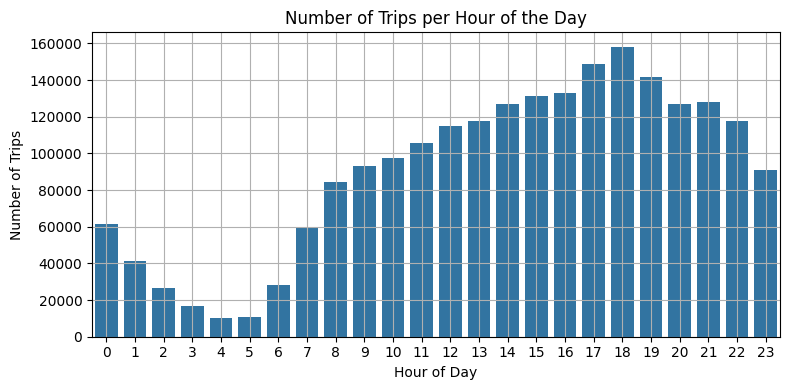

Busiest hour: 18:00 with 158107 trips.


In [69]:
# Visualise the number of trips per hour and find the busiest hour
hour_counts = complete_taxi_records['hour'].value_counts().sort_index()

plt.figure(figsize=(8,4))
sns.barplot(x=hour_counts.index, y=hour_counts.values)
plt.title('Number of Trips per Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.tight_layout()
plt.grid()
plt.show()

busiest_hour = hour_counts.idxmax()
busiest_count = hour_counts.max()
print(f"Busiest hour: {hour_counts.idxmax()}:00 with {hour_counts.max()} trips.")



Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [70]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.07
hour_counts_scaled = (hour_counts / sample_fraction).sort_values(ascending=False)
hour_counts_scaled.head()




hour
18    2.258671e+06
17    2.123214e+06
19    2.024829e+06
16    1.895086e+06
15    1.873157e+06
Name: count, dtype: float64

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

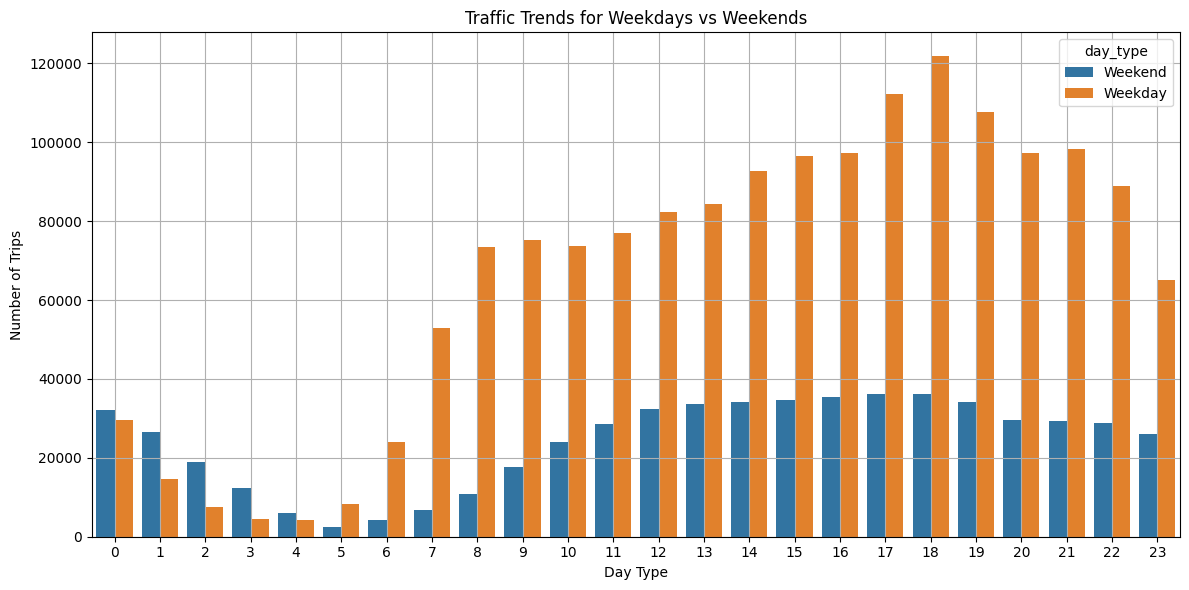

In [71]:
# Compare traffic trends for the week days and weekends
complete_taxi_records['day_type'] = complete_taxi_records['day'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')

plt.figure(figsize=(12,6))
sns.countplot(data=complete_taxi_records, x='hour',hue = 'day_type')
plt.title('Traffic Trends for Weekdays vs Weekends')
plt.xlabel('Day Type')
plt.ylabel('Number of Trips')
plt.ticklabel_format(axis='y', style='plain')
plt.tight_layout()
plt.grid()
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

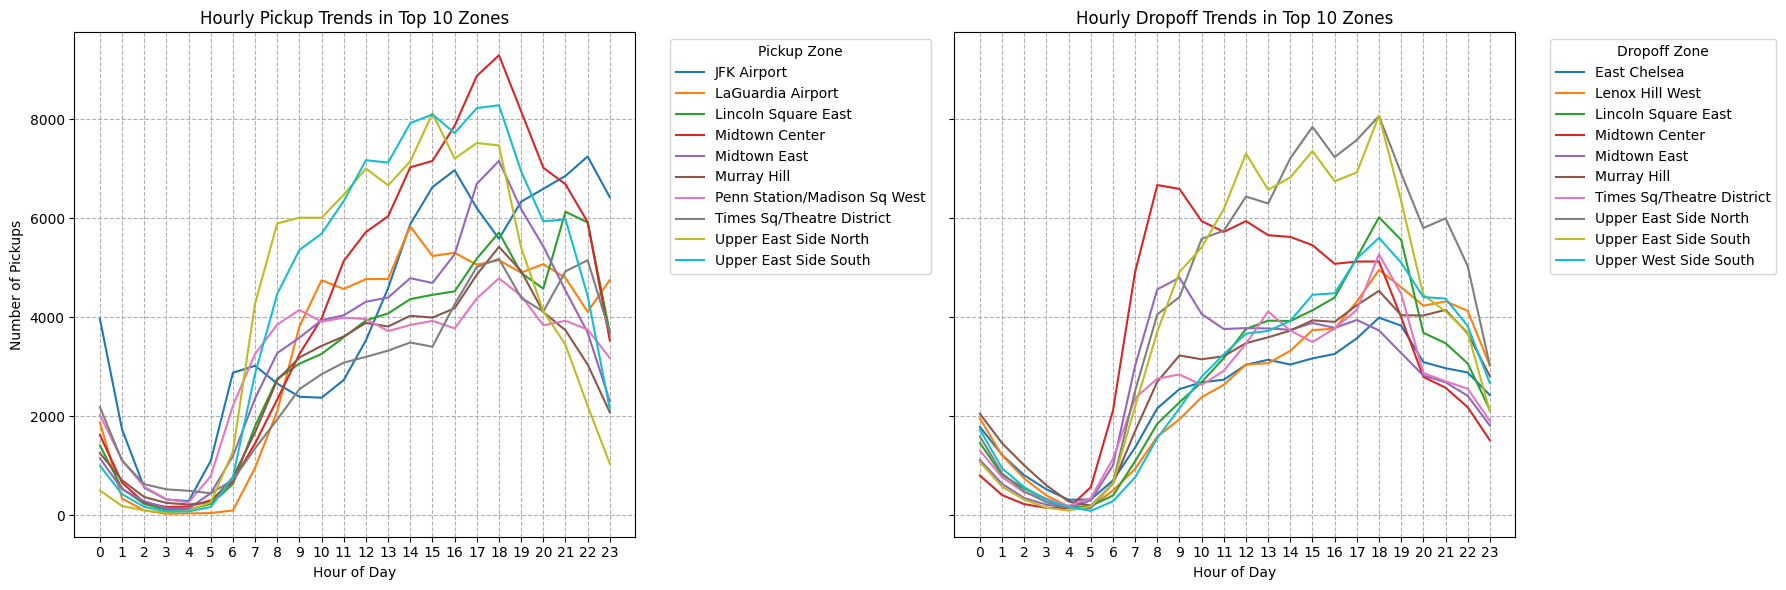

In [72]:
# Find top 10 pickup and dropoff zones
complete_taxi_records['pickup_hour'] = complete_taxi_records['tpep_pickup_datetime'].dt.hour
complete_taxi_records['dropoff_hour'] = complete_taxi_records['tpep_dropoff_datetime'].dt.hour

top_pickup_zones = complete_taxi_records['PULocationID'].value_counts().head(10).index
top_dropoff_zones =complete_taxi_records['DOLocationID'].value_counts().head(10).index


pickup = complete_taxi_records[complete_taxi_records['PULocationID'].isin(top_pickup_zones)]
dropoff = complete_taxi_records[complete_taxi_records['DOLocationID'].isin(top_dropoff_zones)]

hourly_pickups = pickup.groupby(['PULocationID', 'pickup_hour']).size().reset_index(name='trip_count').merge(zones[['LocationID', 'zone']], left_on='PULocationID', right_on='LocationID', how='left')

hourly_dropoffs = dropoff.groupby(['DOLocationID', 'dropoff_hour']).size().reset_index(name='trip_count').merge(zones[['LocationID', 'zone']], left_on='DOLocationID', right_on='LocationID', how='left')


fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

sns.lineplot(data=hourly_pickups, x='pickup_hour', y='trip_count', hue='zone', ax=axes[0])
axes[0].set_title('Hourly Pickup Trends in Top 10 Zones')
axes[0].set_xlabel('Hour of Day')
axes[0].set_ylabel('Number of Pickups')
axes[0].grid(True, linestyle='--')
axes[0].set_xticks(range(0, 24))
axes[0].legend(title='Pickup Zone', bbox_to_anchor=(1.05, 1), loc='upper left')

sns.lineplot(data=hourly_dropoffs, x='dropoff_hour', y='trip_count', hue='zone', ax=axes[1])
axes[1].set_title('Hourly Dropoff Trends in Top 10 Zones')
axes[1].set_xlabel('Hour of Day')
axes[1].set_ylabel('Number of Dropoffs')
axes[1].grid(True, linestyle='--')
axes[1].set_xticks(range(0, 24))
axes[1].legend(title='Dropoff Zone', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()



**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

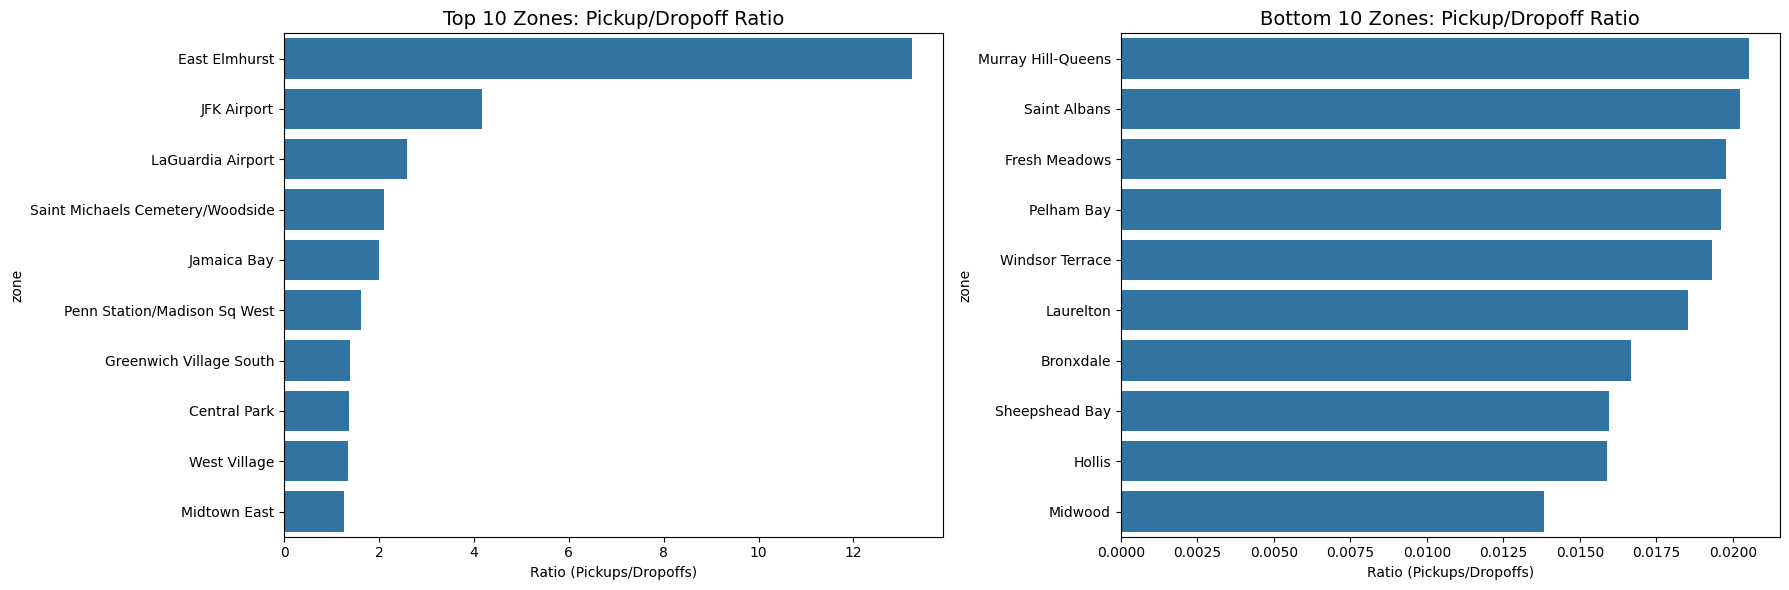

In [73]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
pickups_by_zone = (complete_taxi_records.groupby('PULocationID').size().reset_index(name='pickups').merge(zones[['LocationID', 'zone']], left_on='PULocationID', right_on='LocationID', how='left'))
dropoffs_by_zone = (complete_taxi_records.groupby('DOLocationID').size().reset_index(name='dropoffs').merge(zones[['LocationID', 'zone']], left_on='DOLocationID', right_on='LocationID', how='left'))

zone_ratio = (pickups_by_zone[['zone', 'pickups']].merge(dropoffs_by_zone[['zone', 'dropoffs']], on='zone', how='inner').assign(ratio=lambda x: x['pickups'] / x['dropoffs']).sort_values('ratio', ascending=False))

fig,axes = plt.subplots(1,2,figsize=(18,6))

sns.barplot(data=zone_ratio.head(10), x='ratio', y='zone', ax=axes[0])
axes[0].set_title('Top 10 Zones: Pickup/Dropoff Ratio', fontsize=14)
axes[0].set_xlabel('Ratio (Pickups/Dropoffs)')

sns.barplot(data=zone_ratio.tail(10), x='ratio', y='zone', ax=axes[1])
axes[1].set_title('Bottom 10 Zones: Pickup/Dropoff Ratio', fontsize=14)
axes[1].set_xlabel('Ratio (Pickups/Dropoffs)')

plt.tight_layout()
plt.show()

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

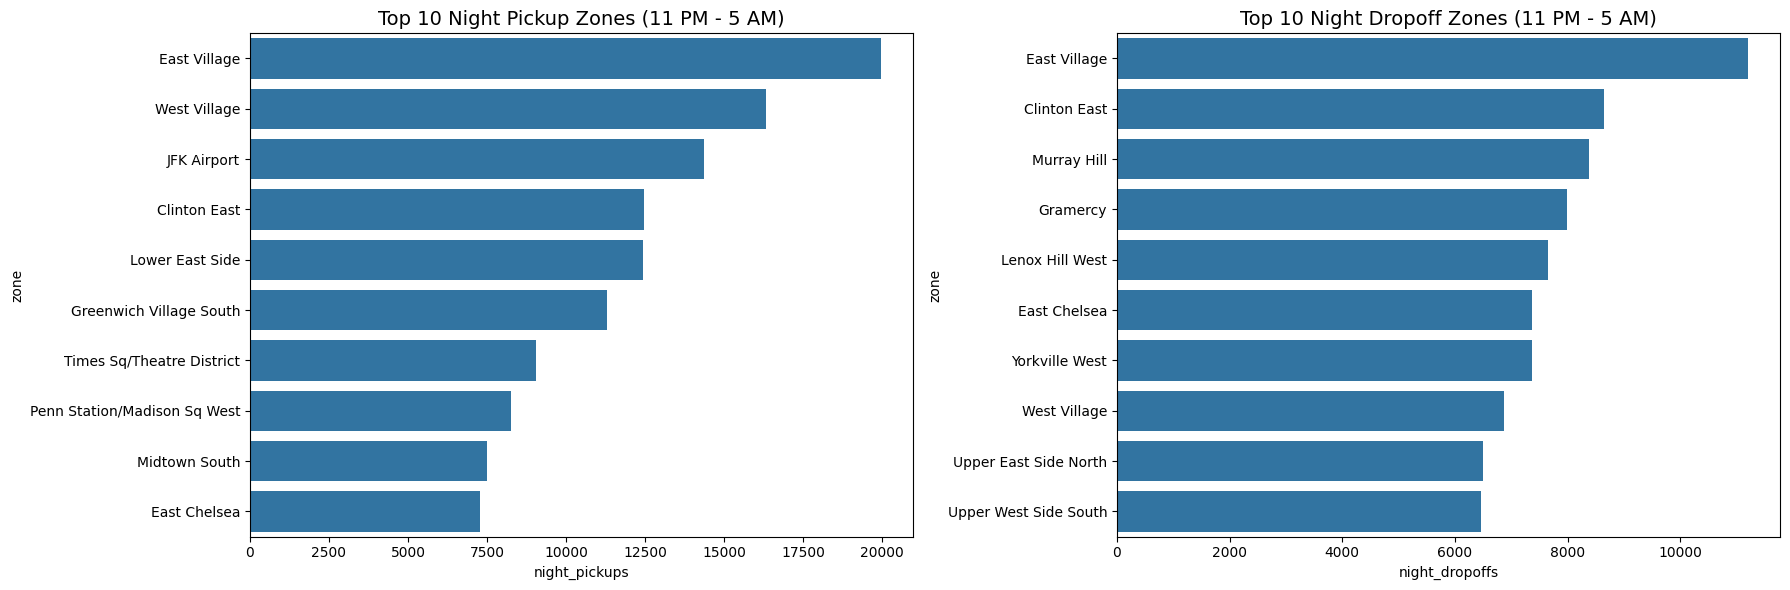

In [74]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

night_hours = [23, 0, 1, 2, 3, 4, 5]

night_pickups = complete_taxi_records[complete_taxi_records['pickup_hour'].isin(night_hours)]
night_dropoffs = complete_taxi_records[complete_taxi_records['dropoff_hour'].isin(night_hours)]

top_night_pickups = (night_pickups.groupby('PULocationID').size().reset_index(name='night_pickups').merge(zones[['LocationID', 'zone']], left_on='PULocationID', right_on='LocationID', how='left').sort_values('night_pickups', ascending=False).head(10))

top_night_dropoffs = (night_dropoffs.groupby('DOLocationID').size().reset_index(name='night_dropoffs').merge(zones[['LocationID', 'zone']], left_on='DOLocationID', right_on='LocationID', how='left').sort_values('night_dropoffs', ascending=False).head(10))

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.barplot(data=top_night_pickups, x='night_pickups', y='zone', ax=axes[0])
axes[0].set_title('Top 10 Night Pickup Zones (11 PM - 5 AM)', fontsize=14)

sns.barplot(data=top_night_dropoffs, x='night_dropoffs', y='zone', ax=axes[1])
axes[1].set_title('Top 10 Night Dropoff Zones (11 PM - 5 AM)', fontsize=14)

plt.tight_layout()
plt.show()


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

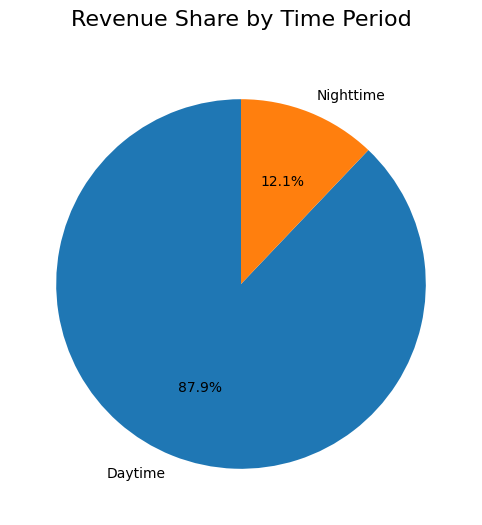

In [75]:
# Filter for night hours (11 PM to 5 AM)
revenue_share = (complete_taxi_records.assign(period=lambda x: np.where(x['pickup_hour'].isin(night_hours),'Nighttime','Daytime')))
revenue_share = revenue_share.groupby('period')['total_amount'].sum().transform(lambda x: x / x.sum() * 100).round(1)
revenue_share = revenue_share.reset_index(name='revenue_share')

plt.figure(figsize=(8, 6))
plt.pie(revenue_share['revenue_share'],labels=revenue_share['period'],autopct='%1.1f%%',startangle=90)
plt.title('Revenue Share by Time Period', fontsize=16, pad=20)
plt.show()


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

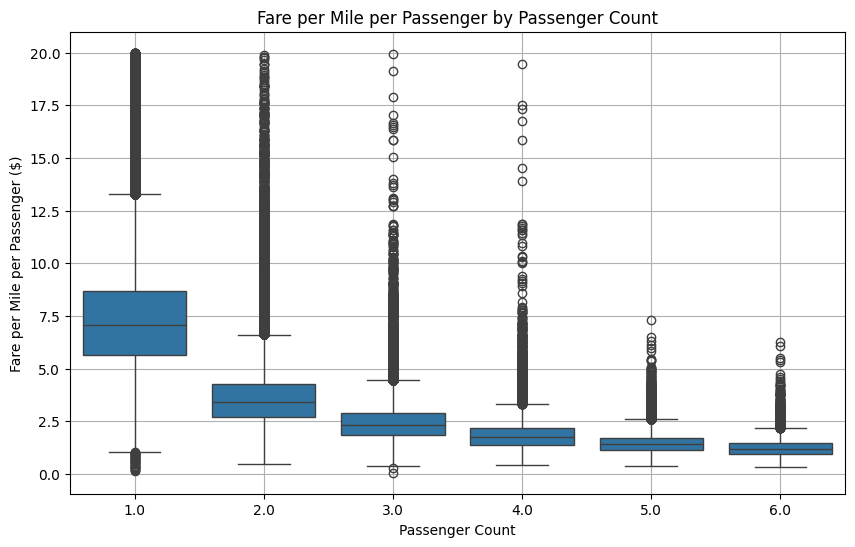

In [76]:
# Analyse the fare per mile per passenger for different passenger counts
valid_trips = complete_taxi_records[(complete_taxi_records['trip_distance'] >= 0.5) & (complete_taxi_records['fare_amount'] > 2)]

valid_trips['fare_per_mile_per_passenger'] = (valid_trips['fare_amount'] / (valid_trips['trip_distance'] * valid_trips['passenger_count']))

filtered = valid_trips[valid_trips['fare_per_mile_per_passenger'] < 20]


plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered, x='passenger_count', y='fare_per_mile_per_passenger')
plt.title('Fare per Mile per Passenger by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Fare per Mile per Passenger ($)')
plt.grid()
plt.show()





**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

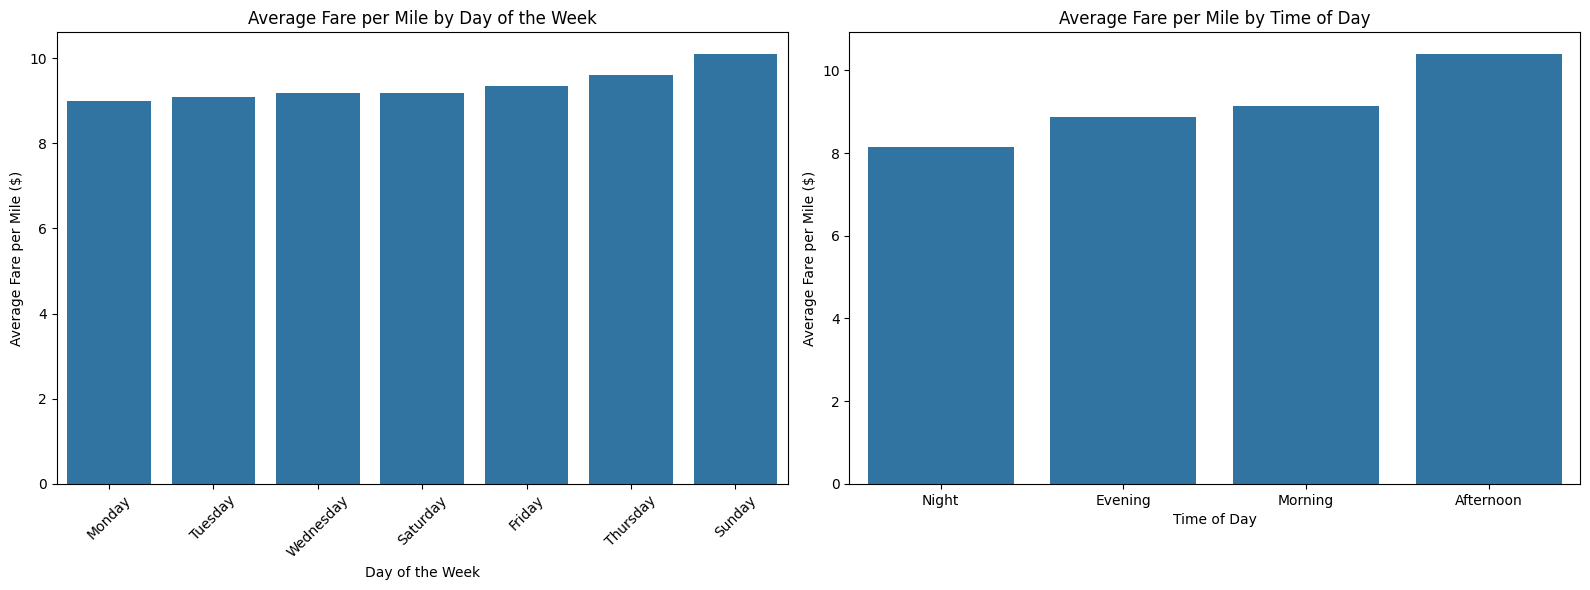

In [77]:
# Compare the average fare per mile for different days and for different times of the day
complete_taxi_records = complete_taxi_records[(complete_taxi_records['trip_distance'] > 0) & (complete_taxi_records['fare_amount'] > 0)]

def categorize_time_of_day(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 22:
        return 'Evening'
    else:
        return 'Night'

complete_taxi_records['time_of_day'] = complete_taxi_records['hour'].apply(categorize_time_of_day)
complete_taxi_records['fare_per_mile'] = complete_taxi_records['fare_amount'] / complete_taxi_records['trip_distance']

avg_fare_day = complete_taxi_records.groupby('day')['fare_per_mile'].mean().sort_values()
avg_fare_time = complete_taxi_records.groupby('time_of_day')['fare_per_mile'].mean().sort_values()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.barplot(x=avg_fare_day.index, y=avg_fare_day.values, ax=axes[0])
axes[0].set_title('Average Fare per Mile by Day of the Week')
axes[0].set_xlabel('Day of the Week')
axes[0].set_ylabel('Average Fare per Mile ($)')
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(x=avg_fare_time.index, y=avg_fare_time.values, ax=axes[1])
axes[1].set_title('Average Fare per Mile by Time of Day')
axes[1].set_xlabel('Time of Day')
axes[1].set_ylabel('Average Fare per Mile ($)')

plt.tight_layout()
plt.show()

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

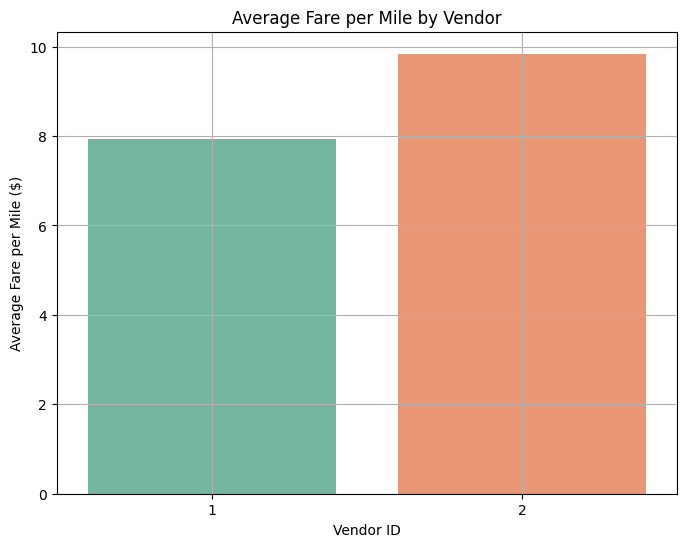

In [78]:
# Compare fare per mile for different vendors
avg_fare_vendor = complete_taxi_records.groupby('VendorID')['fare_per_mile'].mean().sort_values()

plt.figure(figsize=(8, 6))
sns.barplot(x=avg_fare_vendor.index.astype(str), y=avg_fare_vendor.values, palette='Set2')
plt.title('Average Fare per Mile by Vendor')
plt.xlabel('Vendor ID')
plt.ylabel('Average Fare per Mile ($)')
plt.grid(True)
plt.show()


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


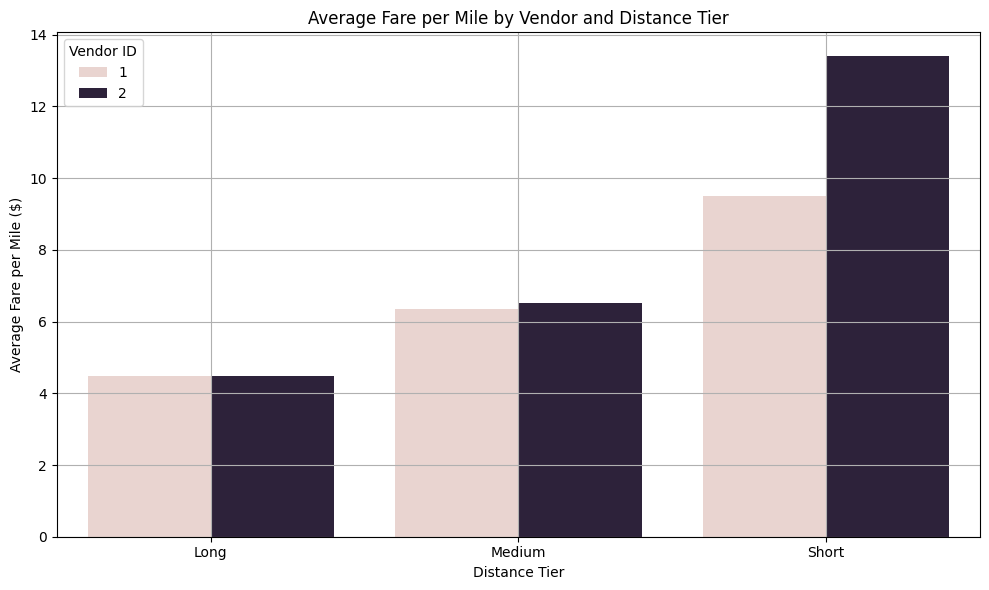

In [79]:
# Defining distance tiers
def categorize_distance(miles):
    if miles <= 2:
        return 'Short'
    elif 2 < miles <= 5:
        return 'Medium'
    else:
        return 'Long'

complete_taxi_records['distance_tier'] = complete_taxi_records['trip_distance'].apply(categorize_distance)
tiered_records = complete_taxi_records.groupby(['VendorID', 'distance_tier'])['fare_per_mile'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=tiered_records, x='distance_tier', y='fare_per_mile', hue='VendorID')
plt.title('Average Fare per Mile by Vendor and Distance Tier')
plt.xlabel('Distance Tier')
plt.ylabel('Average Fare per Mile ($)')
plt.legend(title='Vendor ID')
plt.grid(True)
plt.tight_layout()
plt.show()




##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

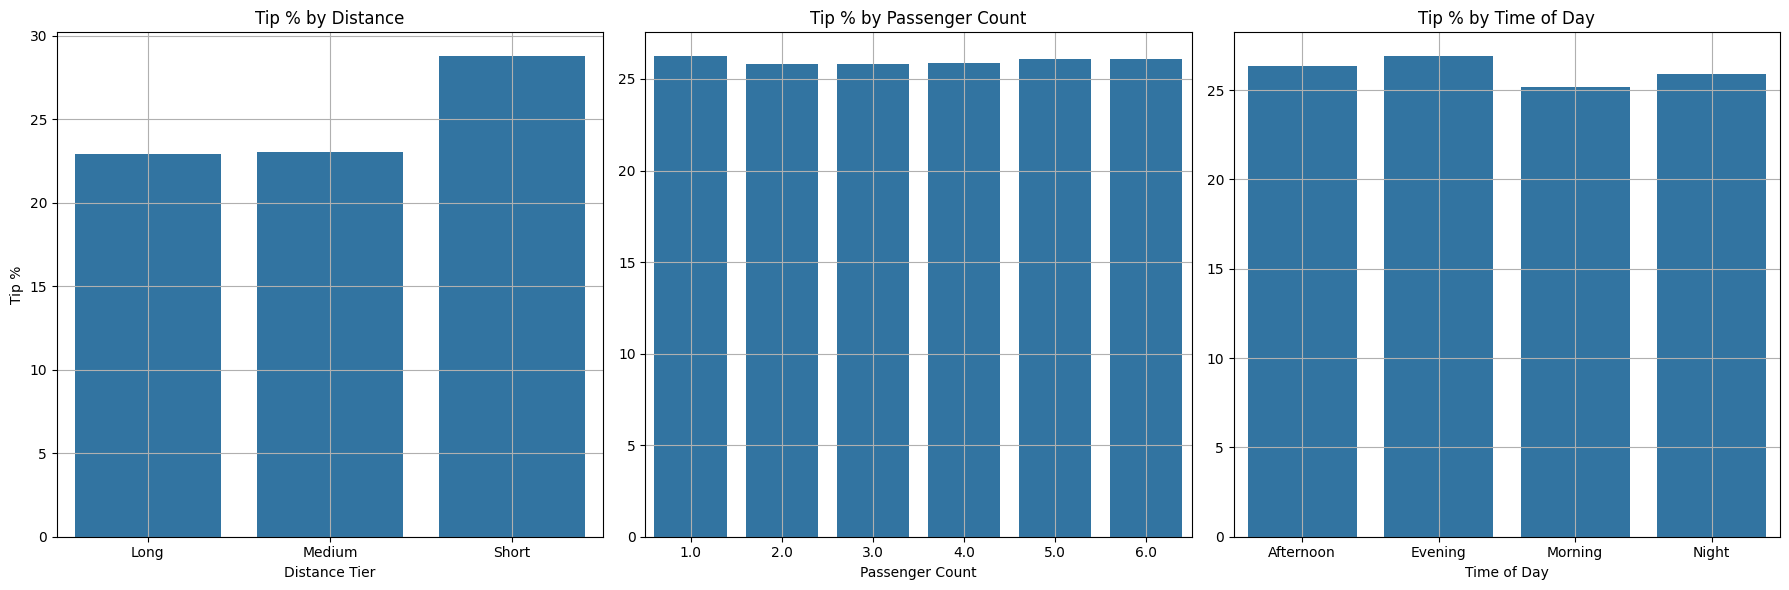

In [80]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
complete_taxi_records['tip_percentage'] = (complete_taxi_records['tip_amount'] / complete_taxi_records['fare_amount']) * 100
tips_distance = complete_taxi_records.groupby('distance_tier')['tip_percentage'].mean().reset_index()
tips_passenger = complete_taxi_records.groupby('passenger_count')['tip_percentage'].mean().reset_index()
tips_daytime = complete_taxi_records.groupby('time_of_day')['tip_percentage'].mean().reset_index()

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.barplot(data=tips_distance, x='distance_tier', y='tip_percentage', ax=axes[0])
axes[0].set_title('Tip % by Distance')
axes[0].set_xlabel('Distance Tier')
axes[0].set_ylabel('Tip %')
axes[0].grid()

sns.barplot(data=tips_passenger, x='passenger_count', y='tip_percentage', ax=axes[1])
axes[1].set_title('Tip % by Passenger Count')
axes[1].set_xlabel('Passenger Count')
axes[1].set_ylabel('')
axes[1].grid()

sns.barplot(data=tips_daytime, x='time_of_day', y='tip_percentage', ax=axes[2])
axes[2].set_title('Tip % by Time of Day')
axes[2].set_xlabel('Time of Day')
axes[2].set_ylabel('')
axes[2].grid()

plt.tight_layout()
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [81]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

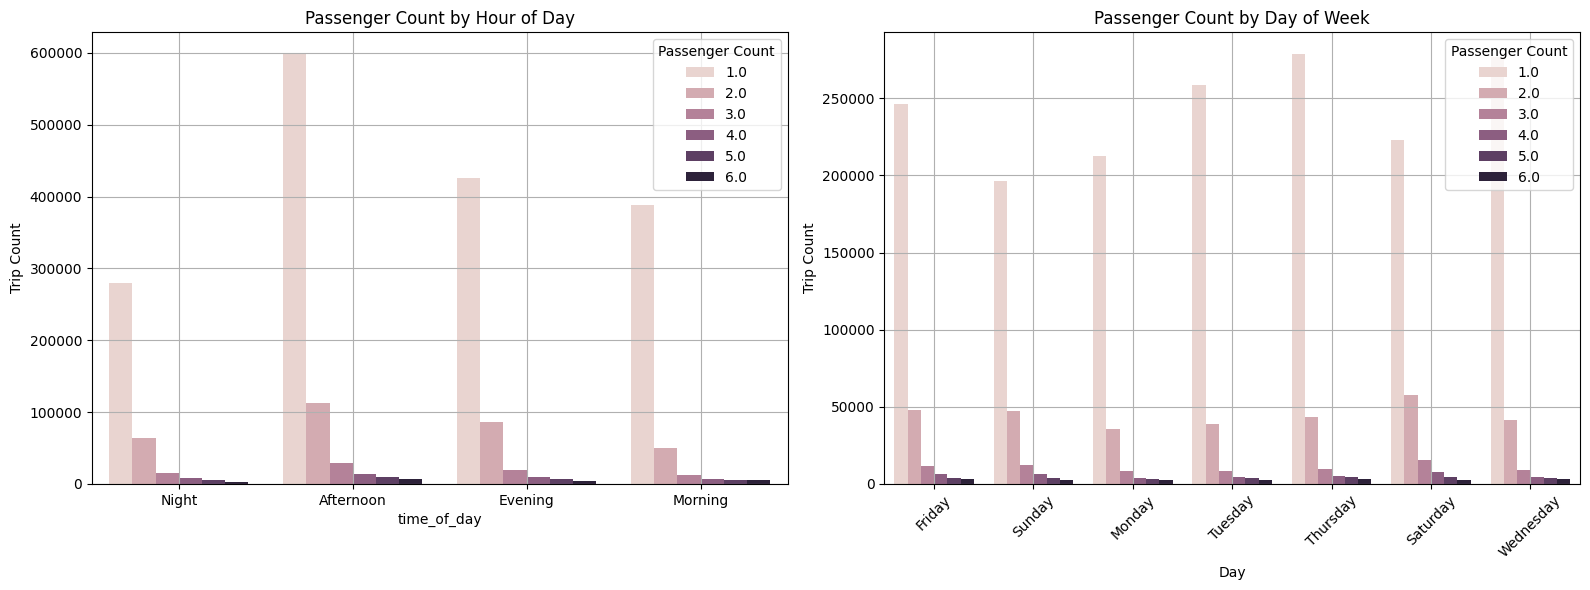

In [82]:
# See how passenger count varies across hours and days
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. Hourly distribution
sns.countplot(data=complete_taxi_records, x='time_of_day', hue='passenger_count', ax=axes[0])
axes[0].set_title('Passenger Count by Hour of Day')
axes[0].set_xlabel('time_of_day')
axes[0].set_ylabel('Trip Count')
axes[0].legend(title='Passenger Count')
axes[0].grid(True)

# 2. Daily distribution
sns.countplot(data=complete_taxi_records, x='day', hue='passenger_count',  ax=axes[1])
axes[1].set_title('Passenger Count by Day of Week')
axes[1].set_xlabel('Day')
axes[1].set_ylabel('Trip Count')
axes[1].legend(title='Passenger Count')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True)

plt.tight_layout()
plt.show()



**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

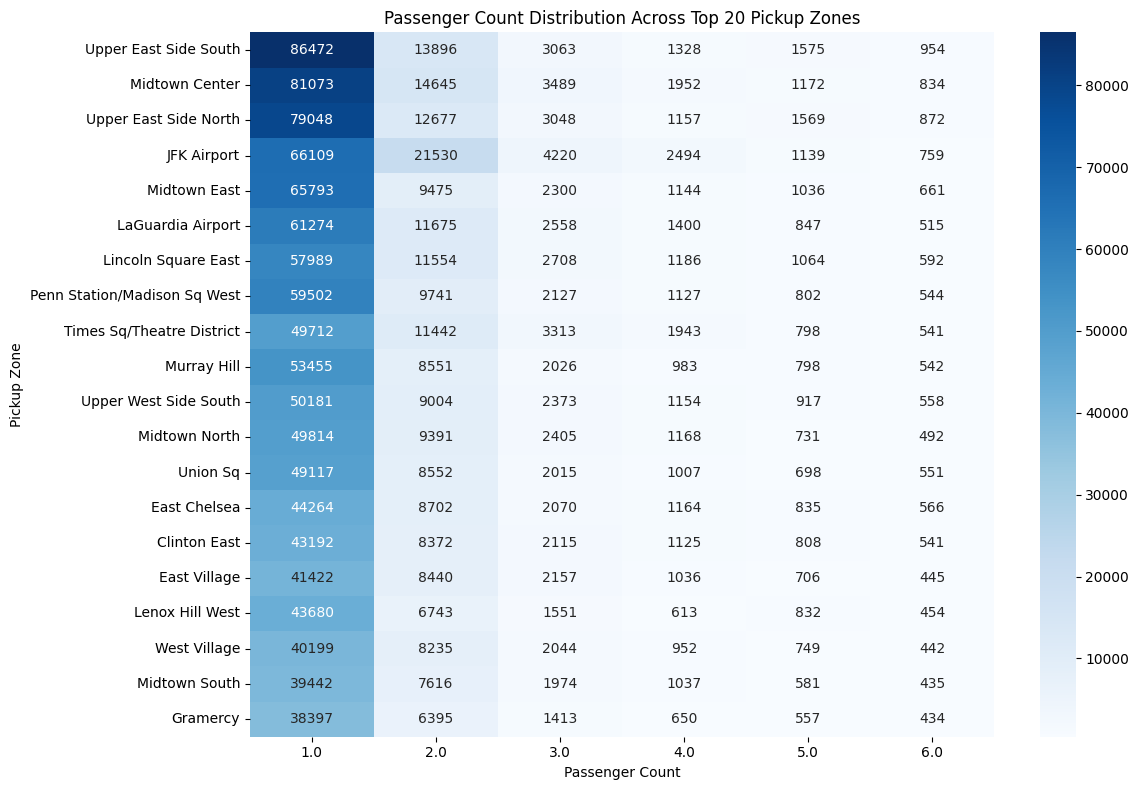

In [83]:
# How does passenger count vary across zones
z = complete_taxi_records.groupby(['zone','passenger_count']).size().reset_index(name='trip_count').fillna(0)
a = z.pivot(index='zone', columns='passenger_count', values='trip_count').fillna(0)
top_zones = a.sum(axis=1).sort_values(ascending=False).head(20).index
zone_passenger_pivot = a.loc[top_zones]
zone_passenger_pivot

plt.figure(figsize=(12, 8))
sns.heatmap(zone_passenger_pivot, annot=True, fmt=".0f", cmap='Blues')
plt.title('Passenger Count Distribution Across Top 20 Pickup Zones')
plt.xlabel('Passenger Count')
plt.ylabel('Pickup Zone')
plt.tight_layout()
plt.show()


<Axes: >

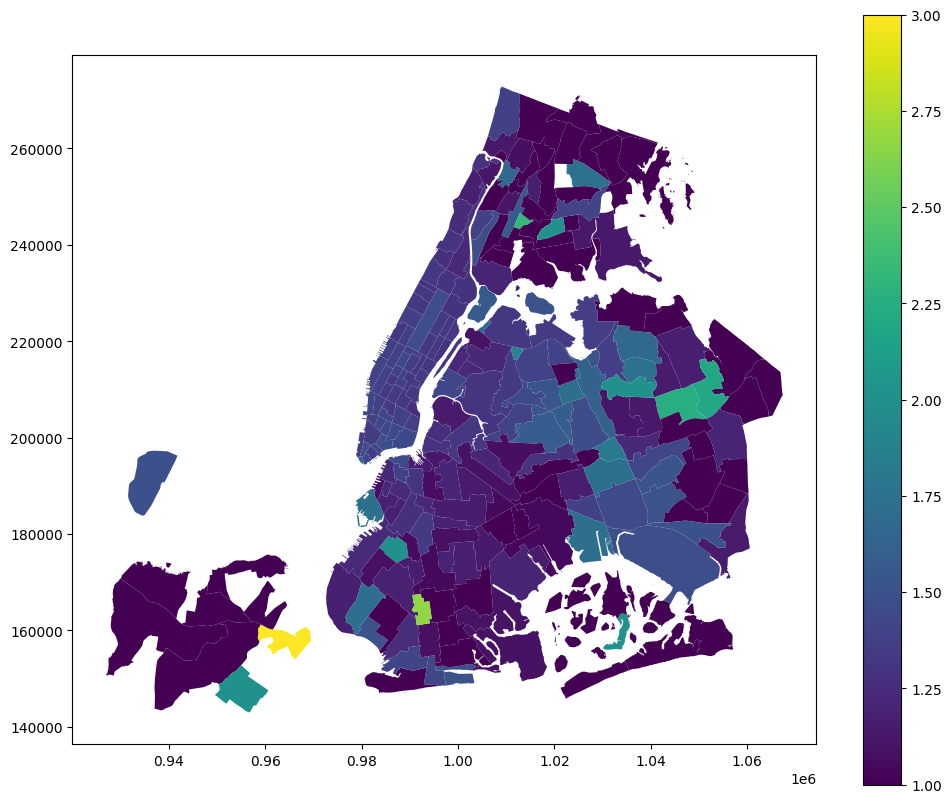

In [84]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
zones['avg_passenger_count'] = zones['zone'].map(complete_taxi_records.groupby('zone')['passenger_count'].mean())
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
zones.plot('avg_passenger_count',legend=True,ax=ax)


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

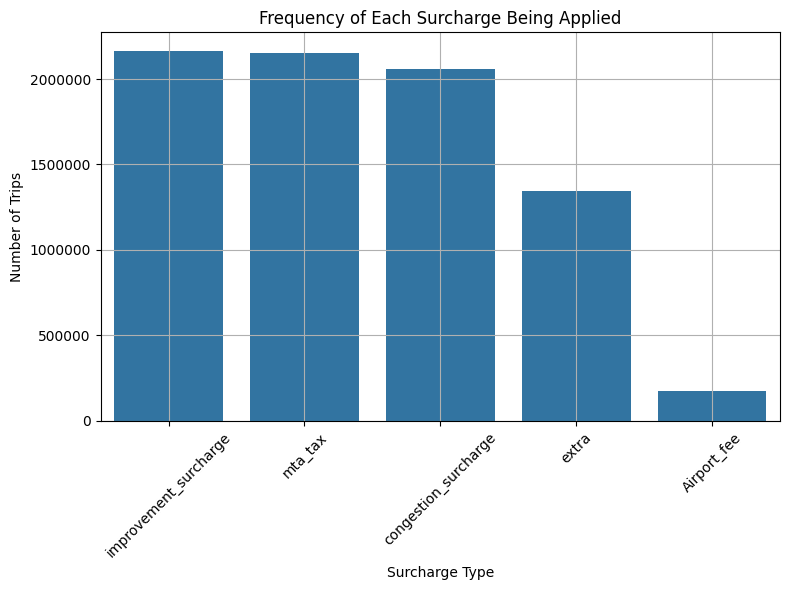

In [85]:
# How often is each surcharge applied?
surcharges= ['extra', 'mta_tax', 'improvement_surcharge', 'congestion_surcharge', 'Airport_fee']

surcharge_freq = complete_taxi_records[surcharges].gt(0).sum().to_frame(name='Trip Count')
surcharge_freq['Percentage'] = (surcharge_freq['Trip Count'] / len(complete_taxi_records) * 100).round(2)
surcharge_freq = surcharge_freq.sort_values(by='Trip Count', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=surcharge_freq.index, y='Trip Count', data=surcharge_freq)
plt.title('Frequency of Each Surcharge Being Applied')
plt.xlabel('Surcharge Type')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True)
plt.tight_layout()
plt.show()

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [86]:
#for mornings  concentrate taxis in Midtown Center, Midtown East, and East Chelsea for drop-offs as inbound commute peaks
#Maintain a small pool of early morning cabs  at JFK and LaGuardia for outbound flights
#for weekdays Prioritize Midtown for commute patterns
#for evening prioritize midtown center , midtown east, and  upper east
#for night concentrate on midtown centre , Lincoln  square , Times square

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [87]:
#For mornings , put more cabs in residential neighborhoods like Upper East Side, Upper West Side, and Murray Hill. People are heading to work, especially toward Midtown and downtown areas.
#for evening , Focus near Midtown East and Penn Station. That’s when workers are leaving their offices and need rides home or to the train.
#Don’t spread out too much. Keep a few cabs near airports (JFK, LaGuardia) and maybe one or two key nightlife areas for the late crowd.
#for weekends  , expect  increase in demand in afternoons
#for week days prioritize Midtown  and Upper East village

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [88]:
#Raise prices slightly during Weekdays: 7–10 AM and 4–7 PM (commute hours) on Weekdays  and  8 PM–1 AM (nightlife traffic) on Weekends
#Increase base fare slightly in high-demand, short-distance zones like Midtown or Times Square.
#Offer small discounts or promos during low-demand hours (like 1–5 AM or afternoon weekdays), or in zones with very few pickups.
#Offer discounts to group rides from and to airports ,there is potential to expand that market
